### Imports and Data Loading

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
import cv2

In [19]:
def load_image(path):
    img = cv2.imread(path)
    img = cv2.resize(img, (32, 32))  # Consistent size
    return img

def load_images(image_paths):
    images = []
    for path in tqdm(image_paths, desc="Loading images"):
        img = load_image(path)
        if img is not None:  # Check if image was loaded successfully
            images.append(img)
        else:
            print(f"Failed to load image: {path}")
    
    print("Images Loaded. Stacking into numpy array...")
    
    # Convert to numpy array with explicit shape
    return np.stack(images)  # Use np.stack with progress tracking

#### Load Images

In [20]:
# Image data loading strings
train_image_label_csv = '/Users/ericcui/repos/imagenette/imagenette2-320/train_imagenette.csv'
val_image_label_csv = "/Users/ericcui/repos/imagenette/imagenette2-320/val_imagenette.csv"
path_prefix = "/Users/ericcui/repos/imagenette/imagenette2-320/"

# Label to index mappings
label_index_mappings = {
    "n01440764": 0,
    "n02102040": 1,
    "n02979186": 2,
    "n03000684": 3,
    "n03028079": 4,
    "n03394916": 5,
    "n03417042": 6,
    "n03425413": 7,
    "n03445777": 8,
    "n03888257": 9,
}

# Label to class mappings
class_mappings = {
    "n01440764": "tench",
    "n02102040": "English springer",
    "n02979186": "cassette player",
    "n03000684": "chain saw",
    "n03028079": "church",
    "n03394916": "French horn",
    "n03417042": "garbage truck",
    "n03425413": "gas pump",
    "n03445777": "golf ball",
    "n03888257": "parachute"
}

In [ ]:
# Loading training dataframe
train_df = pd.read_csv(train_image_label_csv)

# Loading training images
image_paths = train_df['path'].tolist()
image_paths = [path_prefix + path for path in image_paths]
train_images = load_images(image_paths)


In [ ]:
# Loading validation dataframe
test_df = pd.read_csv(val_image_label_csv)

# Loading validatino images
test_image_paths = test_df['path'].tolist()
test_image_paths = [path_prefix + path for path in test_image_paths]
test_images = load_images(test_image_paths)

#### Load Training Labels

In [23]:
train_labels = train_df['noisy_labels_0'].tolist()
train_labels = np.array([label_index_mappings[label] for label in train_labels])

In [24]:
test_labels = test_df['noisy_labels_0'].tolist()
test_labels = np.array([label_index_mappings[label] for label in test_labels])

### Rendering CIFAR-10 Images and Labels

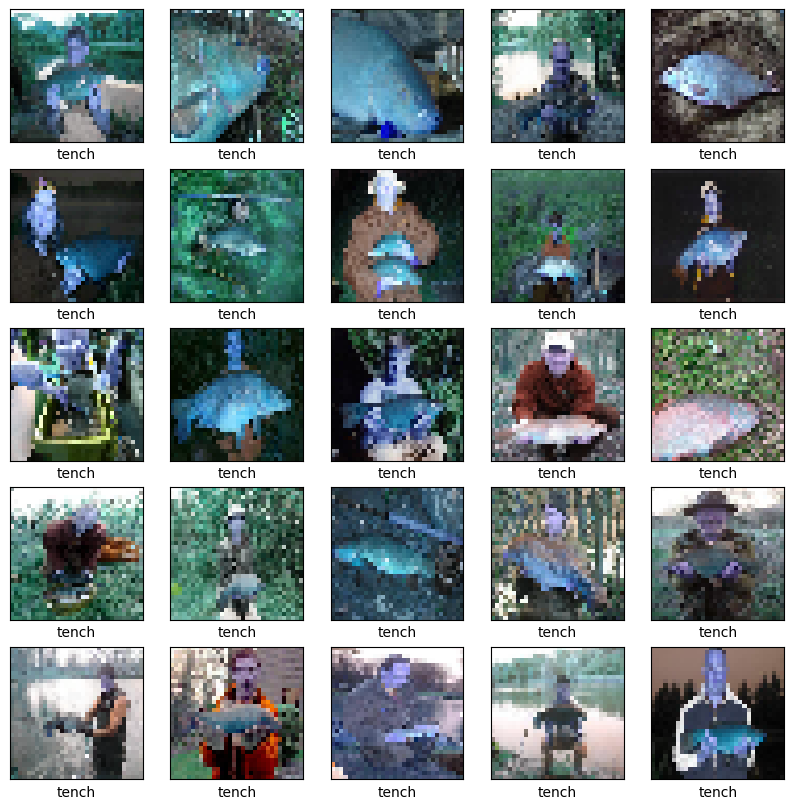

In [39]:
class_names = ['tench', 'English springer', 'cassette player', 'chain saw', 'church', 'French horn', 'garbage truck', 'gas pump', 'golf ball', 'parachute']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Model Configuration

In [ ]:
# CNN Layers
model = models.Sequential()

# Adding a convolutional layer with 32 filters of size 3x3
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Adding a convolutional layer with 64 filters of size 3x3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Adding a convolutional layer with 64 filters of size 3x3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Dense Layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

### Model Compilation and Training

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

### Prototyping